In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
data = pd.read_csv('spettro1d_Boff.txt',sep = '\t')
data.columns = ['pixels', 'y1']
data

,pixels,y1
0,1.5,34.0
1,2.5,33.0
2,3.5,36.0
3,4.5,34.0
4,5.5,40.0
...,...,...
7921,7922.5,35.0
7922,7923.5,34.0
7923,7924.5,32.0
7924,7925.5,0.0


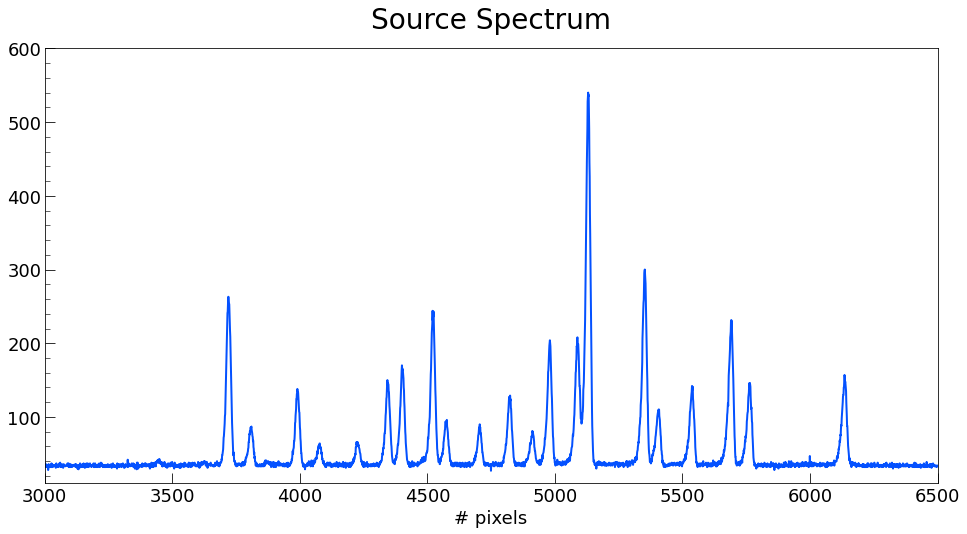

In [4]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(data.pixels[0:7924], data.y1[0:7924], color = '#0451FF', linewidth = 2, label = '')


ax1.tick_params(axis = 'both', which = 'major', labelsize = 18, direction = 'in', length = 10)
ax1.tick_params(axis = 'y', which = 'minor', labelsize = 18, direction = 'in', length = 5)
ax1.tick_params(axis = 'x', which = 'minor', labelsize = 18, direction = 'in', length = 0)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.minorticks_on()

ax1.set_xlabel('# pixels',  fontsize = 18, loc = 'center')

ax1.set_ylim(bottom = 10, top = 600)
ax1.set_xlim(left = 3000, right = 6500)
ax1.set_title('Source Spectrum', fontsize = 28, pad=20)

plt.show() 

In [5]:
fit_data = pd.read_csv('fit_spectrum.txt',sep = '\t')
fit_data.columns = ['pixel', 'y']
fit_data

,pixel,y
0,5130.5,640.2
1,3810.5,588.1
2,3990.5,594.4
3,4078.0,597.5
4,4226.5,603.0
5,4343.5,607.4
6,4400.5,609.6
7,4520.5,614.3
8,4576.5,616.3
9,4705.5,621.7


In [6]:
def lin(x, a, b):
    return a + b * x

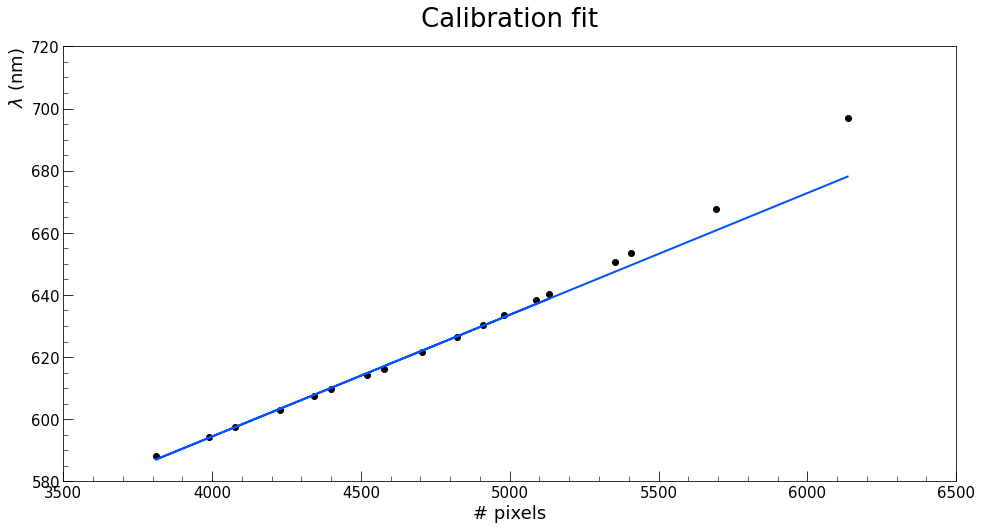

In [7]:

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

par_lin, cov_lin = curve_fit(f = lin, xdata = fit_data.pixel[0:11], ydata = fit_data.y[0:11])

ax1.plot(fit_data.pixel, fit_data.y, marker = 'o', color = '#000000', linewidth=0, label = 'Data')
ax1.plot(fit_data.pixel, lin(fit_data.pixel, *par_lin), color = '#0451FF', linewidth = 2, label = 'Fit')

ax1.set_title('Calibration fit', fontsize = 26,pad=20 )
ax1.set_xlabel('# pixels', fontsize = 18, loc = 'center')
ax1.set_ylabel('$\lambda$ (nm)', fontsize = 18, loc = 'top')

ax1.tick_params(axis = 'both', which = 'major', labelsize = 15, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 15, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()


plt.show()

In [8]:
# get fit parameters 
a = par_lin[0]
b = par_lin[1]
err = np.sqrt(np.diag(cov_lin))
err_a = err[0]
err_b = err[1]
 
a = 'a = (' + format(a,'1.7f') + '±' + format(err_a,'1.7f') + ' ) '
 
b = 'b = (' + format(b, '1.7f') + '±' + format(err_b, '1.7f') + ' ) '
err_a, err_b, a,b

(2.7090495907643057,
 0.0006109398845035584,
 'a = (437.6635790±2.7090496 ) ',
 'b = (0.0391878±0.0006109 ) ')

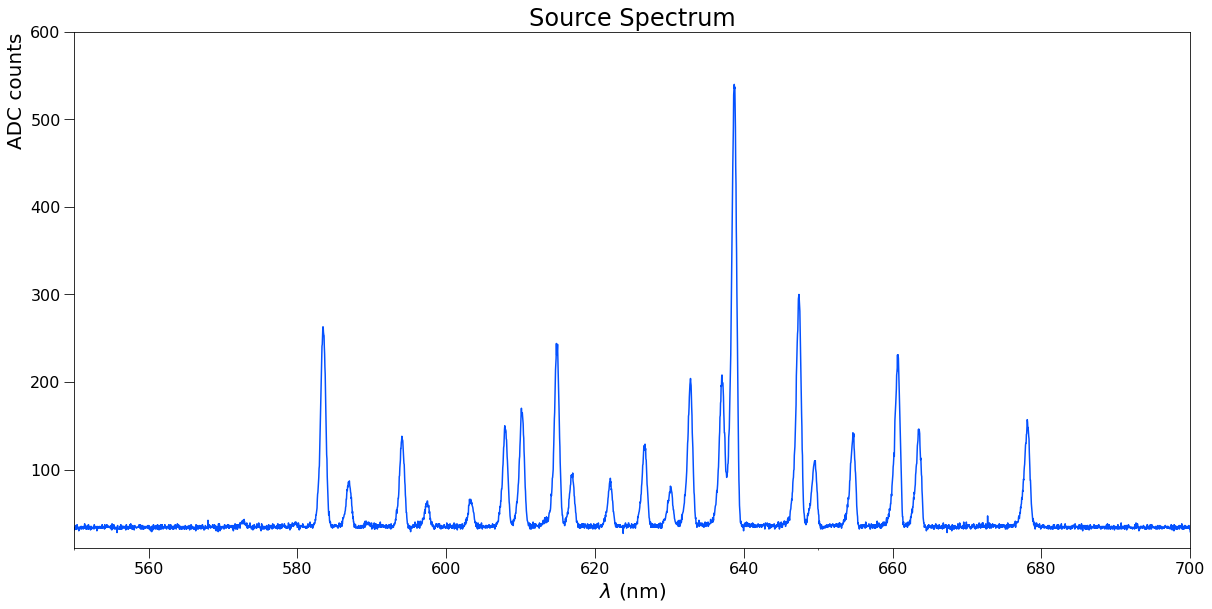

In [9]:
fig = plt.figure(figsize=(20,9.5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot( 0.0391878*data.pixels[0:7924] + 437.6635790, data.y1[0:7924], color = '#0451FF', linewidth = 1.5, label = 'Neon Spectrum $B_{\text{off}}$')


ax1.tick_params(axis = 'both', which = 'major', labelsize = 16, direction = 'out', length = 10)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
#ax1.minorticks_on()

ax1.set_xlabel('$\lambda$ (nm)',  fontsize = 20)
ax1.set_ylabel('ADC counts', fontsize = 20, loc = 'top')

ax1.set_ylim(bottom = 10, top = 600)
ax1.set_xlim(left = 550, right = 700)
ax1.set_title('Source Spectrum', fontsize = 24)
#ax1.legend( loc = 'best', prop = {'size': 18}, ncol = 1, frameon = True, fancybox = False, framealpha = 1)

fig.savefig('spettro1d_Boff.png', dpi = 300)
plt.show()

In [10]:
import matplotlib.colors
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

In [34]:
wavelengths = 0.0391878*data.pixels[0:7924] + 437.6635790
X,Y = np.meshgrid(wavelengths, np.max(data.y1[0:7924]))

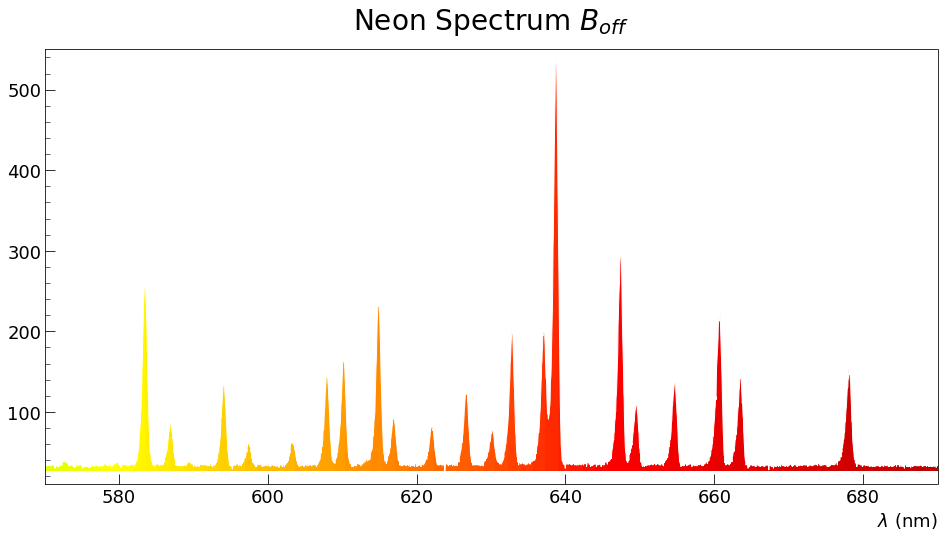

In [35]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot( 0.0391878*data.pixels[0:7924] + 437.6635790, data.y1[0:7924], color = 'White', linewidth = 0, label = '')


ax1.tick_params(axis = 'both', which = 'major', labelsize = 18, direction = 'in', length = 10)
ax1.tick_params(axis = 'y', which = 'minor', labelsize = 18, direction = 'in', length = 5)
ax1.tick_params(axis = 'x', which = 'minor', labelsize = 18, direction = 'in', length = 0)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.minorticks_on()

ax1.set_xlabel('', fontsize = 0, loc = 'center')
ax1.set_xlabel('$\lambda$ (nm)',  fontsize = 18, loc = 'right')

ax1.set_ylim(bottom = 10, top = 550)
ax1.set_xlim(left = 570, right = 690)
ax1.set_title('Neon Spectrum $B_{off}$', fontsize = 28, pad=20)


clim=(350,780)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

extent=(np.min(wavelengths), np.max(wavelengths), np.min(data.y1[0:7924]), np.max(data.y1[0:7924]))


plt.imshow(X, clim=clim,  extent=extent, cmap=spectralmap, aspect='auto')

plt.fill_between(wavelengths, data.y1[0:7924], 550, color='w')

fig.savefig('spettro1d_Boff_colored.jpg', dpi = 800)

plt.show()



In [47]:
data_Bon = pd.read_csv('spettro1d_Bon_5k.txt',sep = '\t')
data_Bon.columns = ['pixels2', 'y2']
data_Bon

,pixels2,y2
0,1.5,34
1,2.5,34
2,3.5,37
3,4.5,35
4,5.5,38
...,...,...
7919,7920.5,34
7920,7921.5,32
7921,7922.5,34
7922,7923.5,34


In [49]:
a = 437.6635790
b = 0.0391878

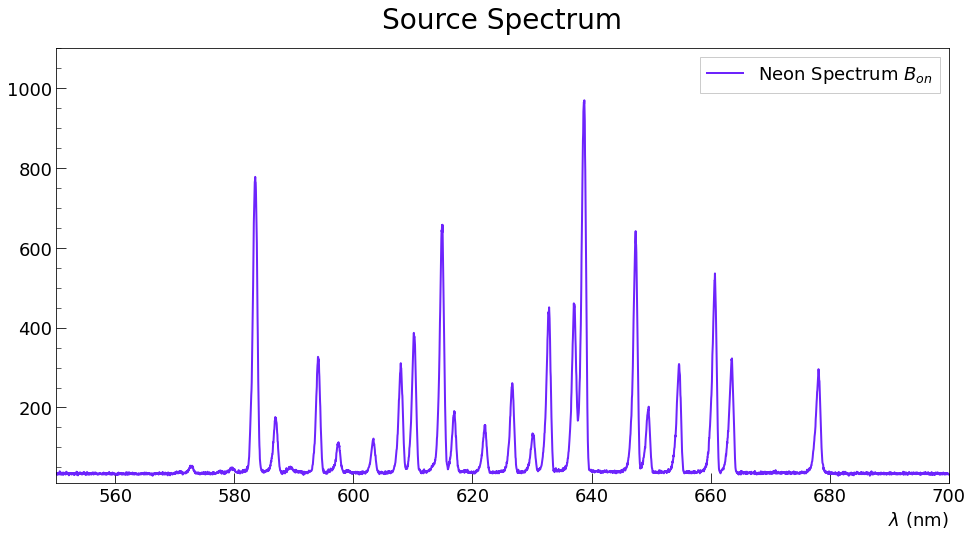

In [60]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
wavelengths = a + b * data_Bon.pixels2
ax1.plot( wavelengths, data_Bon.y2, color = '#6D24FC', linewidth = 2, label = 'Neon Spectrum $B_{on}$')


ax1.tick_params(axis = 'both', which = 'major', labelsize = 18, direction = 'in', length = 10)
ax1.tick_params(axis = 'y', which = 'minor', labelsize = 18, direction = 'in', length = 5)
ax1.tick_params(axis = 'x', which = 'minor', labelsize = 18, direction = 'in', length = 0)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.minorticks_on()

ax1.set_xlabel('', fontsize = 0, loc = 'center')
ax1.set_xlabel('$\lambda$ (nm)',  fontsize = 18, loc = 'right')

ax1.set_ylim(bottom = 10, top = 1100)
ax1.set_xlim(left = 550, right = 700)
ax1.set_title('Source Spectrum', fontsize = 28, pad=20)
ax1.legend( loc = 'best', prop = {'size': 18}, ncol = 1, frameon = True, fancybox = False, framealpha = 1)

fig.savefig('spettro1d_Bon_5k.jpg', dpi = 800)
plt.show()

In [65]:
data_Bon_g = pd.read_csv('spettro1d_Bon_5k_g.txt',sep = '\t')
data_Bon_g.columns = ['pixels3', 'y3']
data_Bon_g

,pixels3,y3
0,1.5,35
1,2.5,33
2,3.5,38
3,4.5,30
4,5.5,37
...,...,...
7919,7920.5,32
7920,7921.5,32
7921,7922.5,34
7922,7923.5,36


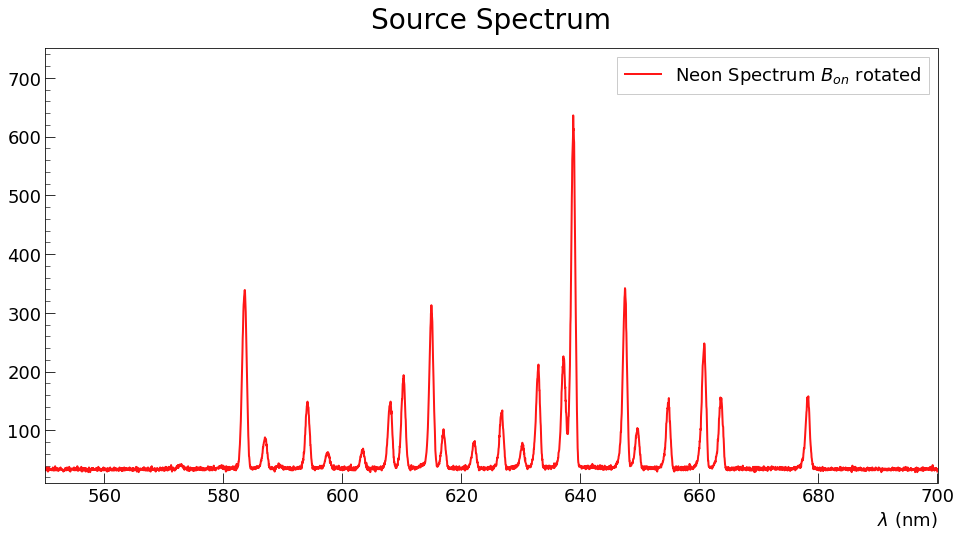

In [71]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
wavelengths = a + b * data_Bon_g.pixels3
ax1.plot( wavelengths, data_Bon_g.y3, color = '#FF1616', linewidth = 2, label = 'Neon Spectrum $B_{on}$ rotated' )

ax1.tick_params(axis = 'both', which = 'major', labelsize = 18, direction = 'in', length = 10)
ax1.tick_params(axis = 'y', which = 'minor', labelsize = 18, direction = 'in', length = 5)
ax1.tick_params(axis = 'x', which = 'minor', labelsize = 18, direction = 'in', length = 0)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.minorticks_on()

ax1.set_xlabel('', fontsize = 0, loc = 'center')
ax1.set_xlabel('$\lambda$ (nm)',  fontsize = 18, loc = 'right')

ax1.set_ylim(bottom = 10, top = 750)
ax1.set_xlim(left = 550, right = 700)
ax1.set_title('Source Spectrum', fontsize = 28, pad=20)
ax1.legend( loc = 'best', prop = {'size': 18}, ncol = 1, frameon = True, fancybox = False, framealpha = 1)

fig.savefig('spettro1d_Bon_5k_g.jpg', dpi = 800)
plt.show()


In [80]:
data_Bon_gp = pd.read_csv('spettro1d_Bon_5k_gp.txt',sep = '\t')
data_Bon_gp.columns = ['pixels4', 'y4']
data_Bon_gp

,pixels4,y4
0,1.5,34
1,2.5,35
2,3.5,37
3,4.5,35
4,5.5,38
...,...,...
7919,7920.5,33
7920,7921.5,36
7921,7922.5,37
7922,7923.5,31


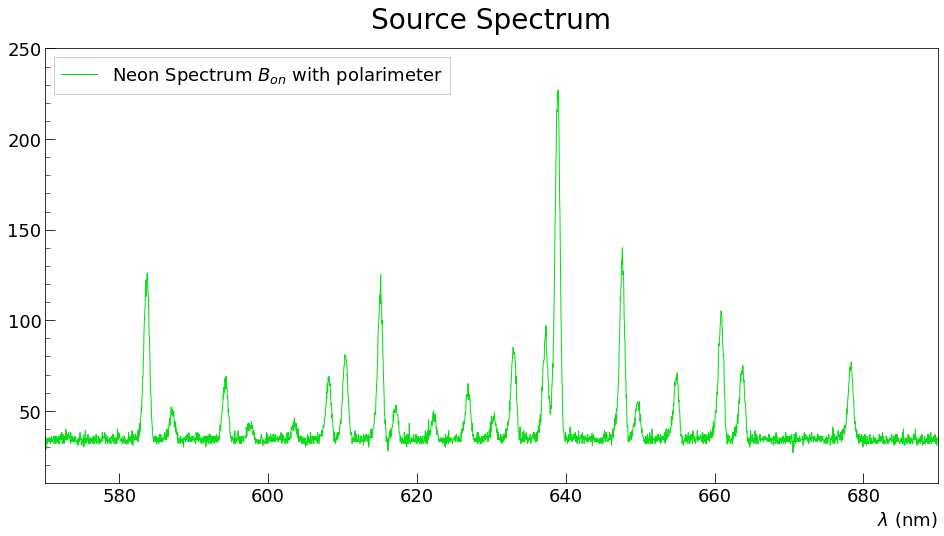

In [87]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
wavelengths = a + b * data_Bon_gp.pixels4
ax1.plot( wavelengths, data_Bon_gp.y4, color = '#09DD16', linewidth = 1, label = 'Neon Spectrum $B_{on}$ with polarimeter' )


ax1.tick_params(axis = 'both', which = 'major', labelsize = 18, direction = 'in', length = 10)
ax1.tick_params(axis = 'y', which = 'minor', labelsize = 18, direction = 'in', length = 5)
ax1.tick_params(axis = 'x', which = 'minor', labelsize = 18, direction = 'in', length = 0)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.minorticks_on()

ax1.set_xlabel('', fontsize = 0, loc = 'center')
ax1.set_xlabel('$\lambda$ (nm)',  fontsize = 18, loc = 'right')

ax1.set_ylim(bottom = 10, top = 250)
ax1.set_xlim(left = 570, right = 690)
ax1.set_title('Source Spectrum', fontsize = 28, pad=20)
ax1.legend( loc = 'best', prop = {'size': 18}, ncol = 1, frameon = True, fancybox = False, framealpha = 1)

fig.savefig('spettro1d_Bon_5k_gp.jpg', dpi = 800)
plt.show()


In [95]:
data_Bon_gp2 = pd.read_csv('spettro1d_Bon_5k_gp2.txt',sep = '\t')
data_Bon_gp2.columns = ['pixels5', 'y5']
data_Bon_gp2

,pixels5,y5
0,1.5,37
1,2.5,34
2,3.5,34
3,4.5,34
4,5.5,36
...,...,...
7919,7920.5,34
7920,7921.5,33
7921,7922.5,35
7922,7923.5,33


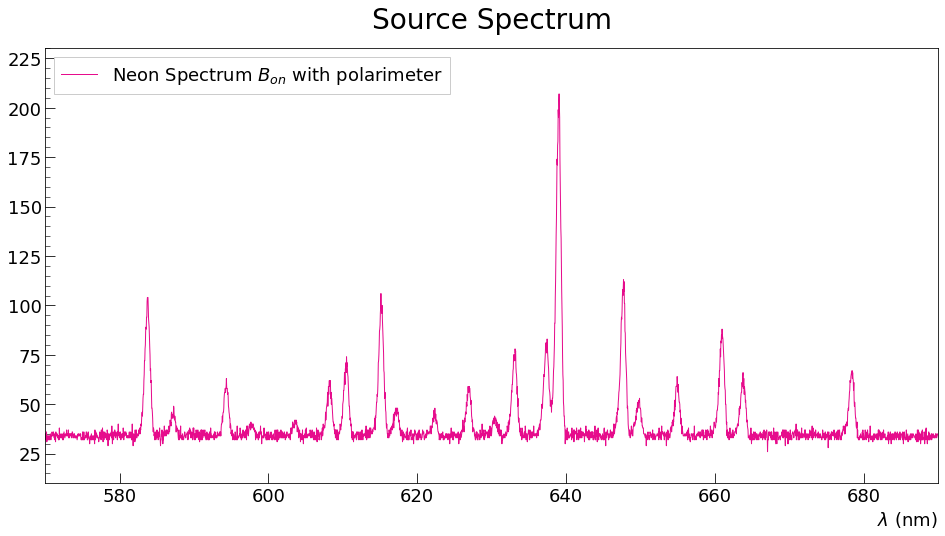

In [99]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
wavelengths = a + b * data_Bon_gp2.pixels5
ax1.plot( wavelengths, data_Bon_gp2.y5, color = '#E60C8C', linewidth = 1, label = 'Neon Spectrum $B_{on}$ with polarimeter' )

ax1.tick_params(axis = 'both', which = 'major', labelsize = 18, direction = 'in', length = 10)
ax1.tick_params(axis = 'y', which = 'minor', labelsize = 18, direction = 'in', length = 5)
ax1.tick_params(axis = 'x', which = 'minor', labelsize = 18, direction = 'in', length = 0)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.minorticks_on()

ax1.set_xlabel('', fontsize = 0, loc = 'center')
ax1.set_xlabel('$\lambda$ (nm)',  fontsize = 18, loc = 'right')

ax1.set_ylim(bottom = 10, top = 230)
ax1.set_xlim(left = 570, right = 690)
ax1.set_title('Source Spectrum', fontsize = 28, pad=20)
ax1.legend( loc = 'upper left', prop = {'size': 18}, ncol = 1, frameon = True, fancybox = False, framealpha = 1)

fig.savefig('spettro1d_Bon_5k_gp2.jpg', dpi = 800)
plt.show()
